In [3]:
# importing the libraries
import time
import numpy as np
from datetime import datetime
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelBinarizer, label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, cross_val_score, LeaveOneOut, cross_validate, cross_val_predict, GroupKFold
from sklearn.metrics import classification_report, roc_curve, auc, plot_roc_curve, roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, make_scorer
from matplotlib.font_manager import FontProperties
from collections import Counter
from imblearn.over_sampling import ADASYN

In [7]:
# importing all models

import time
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

(123, 370)


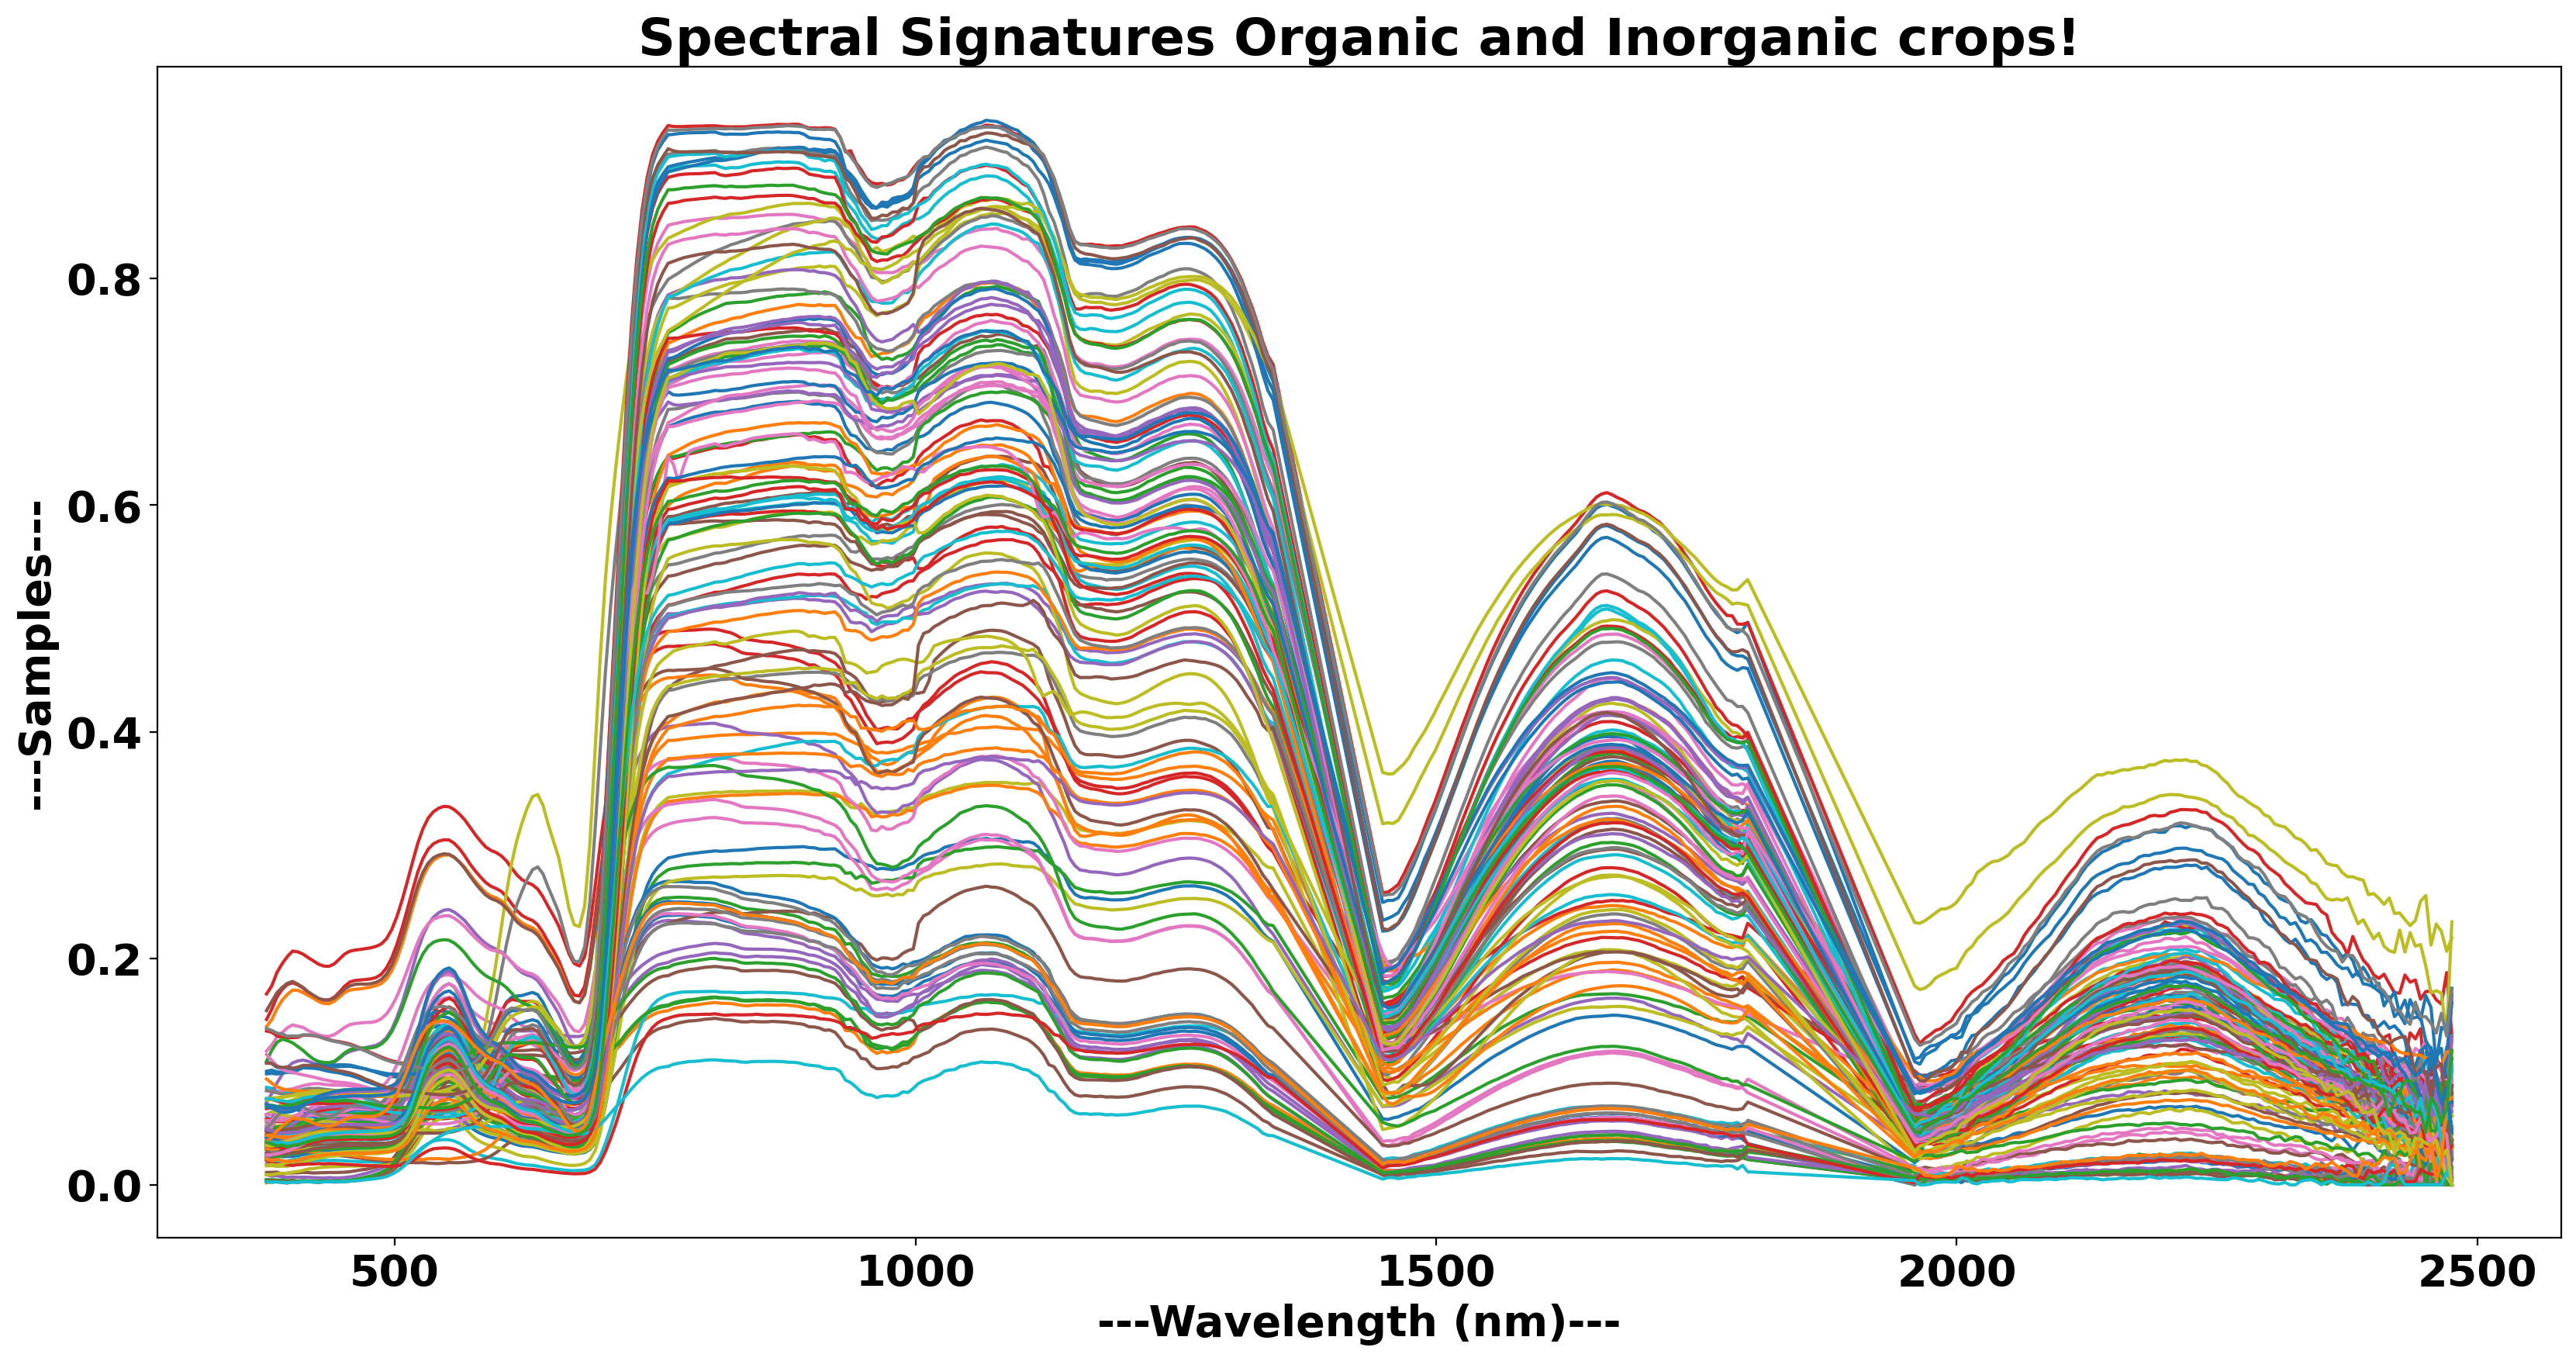

In [11]:
filename = r'data\6 Only Organic Inorganic four crops.xlsx'
data = pd.read_excel(filename, sheet_name='Sheet1')
print(data.shape)

# removing the negative values
df = data.drop(['labels'], axis=1)
df[df < 0] = 0
df['labels'] = data['labels'].values
data = df

# shuffle the Pandas DataFrame rows
data = data.sample(frac = 1)
data = data.sample(frac = 1)

# plotting the data after bad range removed removed
features = data.columns.difference(['labels'])
X_axis = data.columns.values[:-1]
y_axis = data[features].values.T

plt.rcParams.update({'font.size':20, 'font.weight' : 'bold'})
fig = plt.figure(num=None, figsize=(20, 10), dpi=200, facecolor='w', edgecolor='red')
plt.plot(X_axis, y_axis)

plt.xlabel('---Wavelength (nm)---', weight ='bold')
plt.ylabel('---Samples---', weight ='bold')
plt.title('Spectral Signatures Organic and Inorganic crops!', weight ='bold')
plt.show()

Counter({'O_Brinjal': 69, 'Brinjal': 29, 'Red_spinach': 20, 'O_Red_spinach': 5})


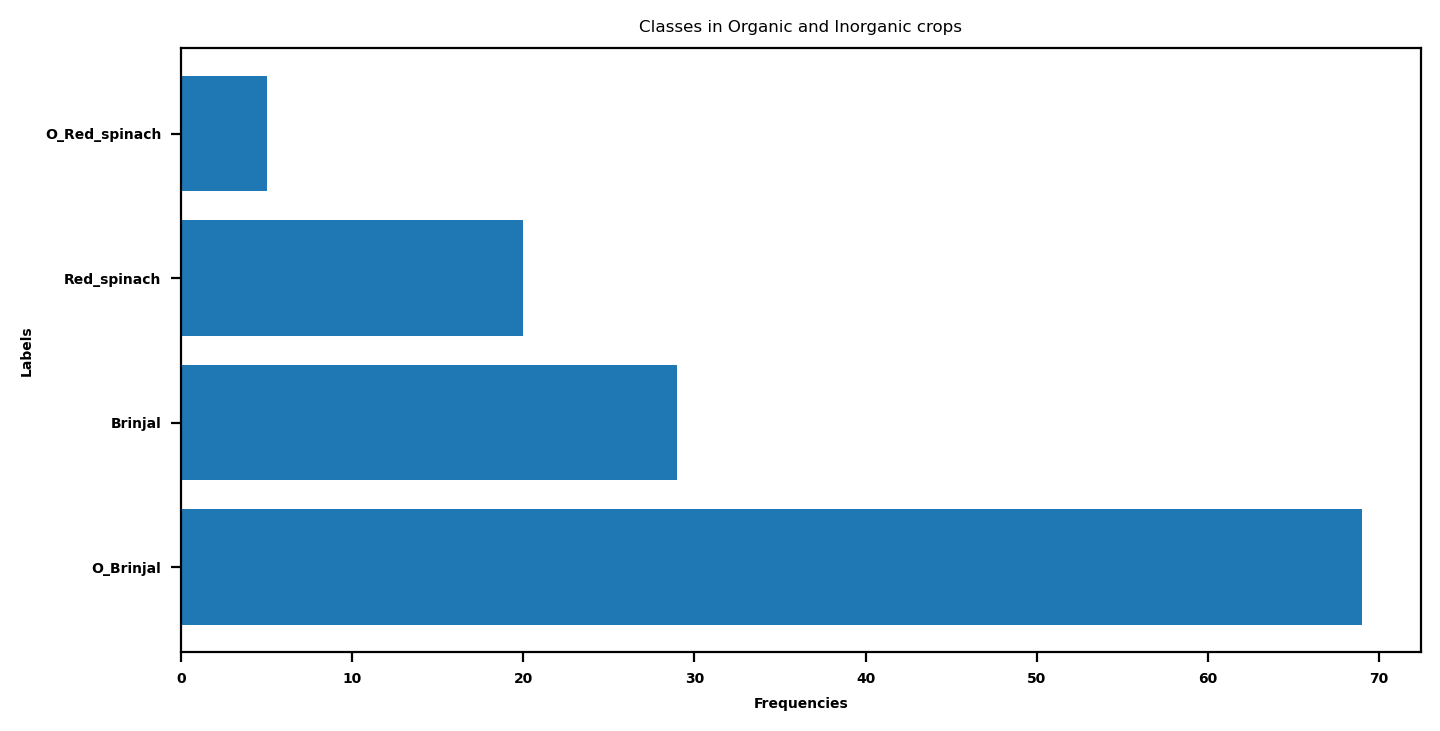

In [12]:
labelss = data['labels'].values

# summarize class distribution
counter = Counter(labelss)
print(counter)

x = list(counter.keys())
y = list(counter.values())

plt.rcParams.update({'font.size':5})
fig = plt.figure(num=None, figsize=(8, 4), dpi=200, facecolor='w', edgecolor='red')
plt.barh(x, y)
plt.ylabel("Labels", weight ='bold')
plt.xlabel("Frequencies", weight ='bold')
plt.title("Classes in Organic and Inorganic crops")
plt.show()

In [13]:
# printing shuffled data
data.head()

376.859985  381.869995  386.880005  391.890015  396.890015  401.899994  \
35     0.027425    0.026556    0.025943    0.024775    0.024964    0.025131   
122    0.055268    0.056467    0.056651    0.056225    0.057824    0.058415   
73     0.030859    0.035642    0.040197    0.045543    0.049688    0.052921   
49     0.039349    0.038793    0.038037    0.037279    0.037715    0.038346   
68     0.051749    0.057981    0.063016    0.066128    0.068640    0.070069   

     406.910004  411.920013  416.929993  421.940002  ...  2435.419922  \
35     0.025765    0.026777    0.027132    0.028217  ...     0.026571   
122    0.059768    0.061115    0.062257    0.063263  ...     0.072055   
73     0.053638    0.053423    0.051895    0.050390  ...     0.000000   
49     0.039246    0.040744    0.042700    0.044246  ...     0.064777   
68     0.068571    0.066964    0.064129    0.061913  ...     0.000000   

     2440.429932  2445.439941  2450.449951  2455.459961  2460.469971  \
35      0.013771     0.018226     0.014262     0.025353     0.048112   
122     0.068753     0.065933     0.098114     0.056646     0.061342   
73      0.000000     0.000000     0.018533     0.000000     0.012883   
49      0.086336     0.084771     0.059404     0.070231     0.055159   
68      0.000000     0.001894     0.000000     0.000000     0.002022   

     2465.47998  2470.47998  2475.48999     labels  
35     0.000000    0.000000    0.000000  O_Brinjal  
122    0.058885    0.053526    0.033425    Brinjal  
73     0.000000    0.000000    0.000000  O_Brinjal  
49     0.049109    0.026386    0.051689  O_Brinjal  
68     0.000000    0.000000    0.000000  O_Brinjal  

[5 rows x 370 columns]

In [14]:
# saving classes and their number of samples in csv 

classes_df = pd.DataFrame()
classes_df.insert(0, "classes", np.asarray(x))
classes_df.insert(1, "frequency", np.asarray(y))

classes_df.to_csv(r'results\6.Organic and Inorganic crops only\classes_part_6.csv')
classes_df.head()

classes  frequency
0      O_Brinjal         69
1        Brinjal         29
2    Red_spinach         20
3  O_Red_spinach          5

In [15]:
from sklearn import preprocessing
 
features = data.columns.difference(['labels'])
X = data[features].values
y = data['labels'].values

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

print(type(X),"X:", X.shape)
print(type(y),"y:", y.shape)
print('\n\nunique values:\n', np.unique(y))

<class 'numpy.ndarray'> X: (123, 369)
<class 'numpy.ndarray'> y: (123,)


unique values:
 [0 1 2 3]


In [16]:
# label encoded class names

le = label_encoder
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Brinjal': 0, 'O_Brinjal': 1, 'O_Red_spinach': 2, 'Red_spinach': 3}


C:\Users\USER\AppData\Local\Temp\ipykernel_8132\510472201.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


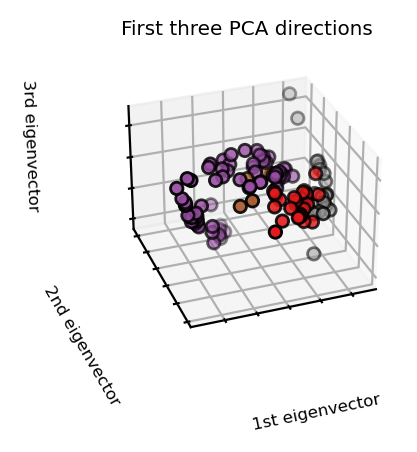

The number of features in the new subspace is  (123, 35)
y shape: (123,)


In [17]:
# Drawing the 3 different components with PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 6, 'font.weight' : 'bold'})

fig = plt.figure(num=None, figsize=(2, 1.5), dpi=200, facecolor='w', edgecolor='red')
ax = Axes3D(fig, elev=-150, azim=110)

X = PCA(n_components= 35).fit_transform(X)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,cmap=plt.cm.Set1, edgecolor='k', s=20)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " , X.shape)
print('y shape:', y.shape)

In [18]:
# y = label_binarize(y, classes=np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify=y)

print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(type(X_test), X_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (86, 35)
<class 'numpy.ndarray'> (86,)
<class 'numpy.ndarray'> (37, 35)
<class 'numpy.ndarray'> (37,)


In [20]:
# model function and evaluation matrices

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

def get_models():
    models = list()
    models.append(LogisticRegression(max_iter=1000))
    models.append(RidgeClassifier())
    models.append(SGDClassifier())
    models.append(KNeighborsClassifier(n_neighbors=6))
    models.append(DecisionTreeClassifier())
    models.append(LinearSVC(dual=False))
    models.append(SVC(C=100, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
    probability=True, tol=0.001, cache_size=200, class_weight=None, 
    verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 45))
    models.append(GaussianNB())
    models.append(AdaBoostClassifier(n_estimators=100, learning_rate=1))
    models.append(RandomForestClassifier())
    models.append(GradientBoostingClassifier())
    models.append(QuadraticDiscriminantAnalysis())
    return models

def cal_matrix(X_train, y_train, X_test, y_test, cls):
    model = cls.fit(X_train, y_train)
    pred = model.predict(X_test)
    # None, 'micro', 'macro', 'weighted', 'samples'
    avg = 'macro'
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average=avg)
    f1 = f1_score(y_test, pred, average=avg)
    recall = recall_score(y_test, pred, average=avg)
    mse = metrics.mean_squared_error(y_test, pred)
    cnf = confusion_matrix(y_test, pred)
    clf_refort = classification_report(y_test, pred)

    return accuracy, precision, f1, recall, mse, cnf, clf_refort

In [21]:
# Classification using simple splitting 

models = get_models()
accuracies = list()
df = pd.DataFrame(columns = ['CLF_Name', 'Accuracy', 'Precision', 'f1_score', 'recall', 'MSE'])

for clf in models:
    acc, precision, f1, recall, mse, cnf, clf_report = cal_matrix(X_train, y_train, X_test, y_test, clf)
    data = {'CLF_Name': type(clf).__name__, 'Accuracy': acc, 'Precision': precision, 'f1_score': f1, 'recall':recall, 'MSE':mse}
    df = df.append(data, ignore_index=True)
    accuracies.append(acc)

print(df, '\n')
print("All Accuracies:", accuracies)
print("max:", max(accuracies))
print("min:", min(accuracies))

                         CLF_Name  Accuracy Precision  f1_score    recall  \
0              LogisticRegression  0.891892  0.644345  0.658263   0.68254   
1                 RidgeClassifier  0.972973  0.714286  0.730769      0.75   
2                   SGDClassifier  0.837838  0.624459  0.593137  0.626984   
3            KNeighborsClassifier  0.891892  0.651786  0.673003  0.698413   
4          DecisionTreeClassifier  0.756757  0.618129  0.588763  0.563492   
5                       LinearSVC  0.972973  0.738636  0.744186      0.75   
6                             SVC  0.945946    0.9375  0.933036  0.944444   
7                      GaussianNB  0.918919  0.676136  0.677222  0.694444   
8              AdaBoostClassifier  0.891892  0.655303  0.644186  0.666667   
9          RandomForestClassifier  0.918919  0.692547  0.688156  0.694444   
10     GradientBoostingClassifier  0.891892  0.881944   0.89623  0.920635   
11  QuadraticDiscriminantAnalysis  0.567568  0.141892  0.181034      0.25   

In [22]:
# 5 fold cross validation, without splitting

num_folds = 5
fold_no = 1

# Define the K-fold Cross Validator
# kfold = KFold(n_splits=num_folds, shuffle=True)
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=11)

df_1 = pd.DataFrame(columns = ['CLF_Name', 'Accuracy', 'Precision', 'f1_score', 'recall', 'MSE'])
df_2 = pd.DataFrame(columns = ['cnf'])
df_3 = pd.DataFrame(columns = ['clf_report'])

last_fold_time = start = datetime.now()
accuracy_10fold, precision_10fold, f1_score_10fold, recall_10fold, mse_10fold = [], [], [], [], []

for train, test in kfold.split(X, y):
    print(f'\n\n------ fold number: {fold_no}--------')
    df_1 = df_1.append({'CLF_Name':fold_no, 'Accuracy':fold_no, 'Precision':fold_no, 
                        'f1_score':fold_no, 'recall':fold_no, 'MSE':fold_no}, ignore_index=True)
    df_2 = df_2.append({'cnf':fold_no}, ignore_index=True)
    df_3 = df_3.append({'clf_report':fold_no}, ignore_index=True)
    models = get_models()
    accuracies, precisions, f1_scores, recalls, MSEs = [], [], [], [], []
    for clf in models:
        acc, precision, f1, recall, mse, cnf, clf_report = cal_matrix(X[train], y[train], X[test], y[test], clf)
        data = {'CLF_Name': type(clf).__name__, 'Accuracy': acc, 'Precision': precision, 'f1_score': f1, 'recall':recall, 'MSE':mse}
        df_1 = df_1.append(data, ignore_index=True)
        df_2 = df_2.append({'cnf':cnf}, ignore_index=True)
        df_3 = df_3.append({'clf_report':clf_report}, ignore_index=True)
        
        accuracies.append(acc)
        precisions.append(precision)
        f1_scores.append(f1)
        recalls.append(recall)
        MSEs.append(mse)

    accuracy_10fold.append(np.asarray(accuracies))
    precision_10fold.append(np.asarray(precisions))
    f1_score_10fold.append(np.asarray(f1_scores))
    recall_10fold.append(np.asarray(recalls))
    mse_10fold.append(np.asarray(MSEs))
    
    print('\n')
    print("All Accuracies:", accuracies)
    print("max:", max(accuracies))
    print("min:", min(accuracies))
    fold_no = fold_no + 1

print('\n .> Dataframe-1: \n', df_1)
print('\n .> Dataframe-2: \n', df_2)
print('\n .> Dataframe-3: \n', df_3)



------ fold number: 1--------


All Accuracies: [0.8, 0.84, 0.88, 0.8, 0.88, 0.84, 0.84, 0.84, 0.8, 0.8, 0.8, 0.56]
max: 0.88
min: 0.56


------ fold number: 2--------


All Accuracies: [0.96, 0.96, 0.96, 0.88, 0.92, 0.96, 1.0, 0.96, 0.8, 0.96, 0.96, 0.56]
max: 1.0
min: 0.56


------ fold number: 3--------


All Accuracies: [0.96, 0.96, 0.96, 0.96, 0.84, 0.96, 1.0, 0.96, 0.96, 0.96, 0.92, 0.56]
max: 1.0
min: 0.56


------ fold number: 4--------


All Accuracies: [0.9166666666666666, 0.9583333333333334, 0.9583333333333334, 0.7916666666666666, 0.875, 0.9583333333333334, 1.0, 0.9583333333333334, 0.9166666666666666, 0.9583333333333334, 0.9166666666666666, 0.5833333333333334]
max: 1.0
min: 0.5833333333333334


------ fold number: 5--------


All Accuracies: [0.9166666666666666, 0.9583333333333334, 0.9583333333333334, 0.9166666666666666, 0.8333333333333334, 0.9583333333333334, 1.0, 0.9166666666666666, 0.75, 0.9166666666666666, 0.8333333333333334, 0.5416666666666666]
max: 1.0
min: 0.5416666

In [23]:
accuracy_10fold = np.asarray(accuracy_10fold)
precision_10fold = np.asarray(precision_10fold)
f1_score_10fold = np.asarray(f1_score_10fold)
recall_10fold = np.asarray(recall_10fold)
mse_10fold = np.asarray(mse_10fold)

cols = ['LogisticRegression', 'RidgeClassifier', 'SGDClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 
        'LinearSVC', 'SVC_rbf', 'GaussianNB', 'AdaBoostClassifier', 'RandomForestClassifier', 
        'GradientBoostingClassifier', 'QuadraticDiscriminantAnalysis']

acc_df = pd.DataFrame(accuracy_10fold, columns = cols).T
pre_df = pd.DataFrame(precision_10fold, columns = cols).T
f1_df = pd.DataFrame(f1_score_10fold, columns = cols).T
recall_df = pd.DataFrame(recall_10fold, columns = cols).T
mse_df = pd.DataFrame(mse_10fold, columns = cols).T

acc_df.to_csv(r'results\6.Organic and Inorganic crops only\1.accuracies.csv')
pre_df.to_csv(r'results\6.Organic and Inorganic crops only\2.precisions.csv')
f1_df.to_csv(r'results\6.Organic and Inorganic crops only\3.f1_scores.csv')
recall_df.to_csv(r'results\6.Organic and Inorganic crops only\4.recalls.csv')
mse_df.to_csv(r'results\6.Organic and Inorganic crops only\5.MSEs.csv')

In [24]:
df_1.to_csv(r'results\6.Organic and Inorganic crops only\df_1.csv')
df_2.to_csv(r'results\6.Organic and Inorganic crops only\df_2.csv')
df_3.to_csv(r'results\6.Organic and Inorganic crops only\df_3.csv')

In [25]:
print(type(clf.classes_), type(le.classes_))
print(le.classes_, ' \n\n\n ', le.classes_)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
['Brinjal' 'O_Brinjal' 'O_Red_spinach' 'Red_spinach']  


  ['Brinjal' 'O_Brinjal' 'O_Red_spinach' 'Red_spinach']


https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html

# Type I Error:- equivalent to False Positives(FP).

# Type II Error:- equivalent to False Negatives(FN).

accuracy_score:  0.9459459459459459
Precision Score:  0.9375
Recall Score:  0.9444444444444444
F1 score: 0.933036
confusion_matrix: 
 [[ 7  0  0  2]
 [ 0 21  0  0]
 [ 0  0  1  0]
 [ 0  0  0  6]]


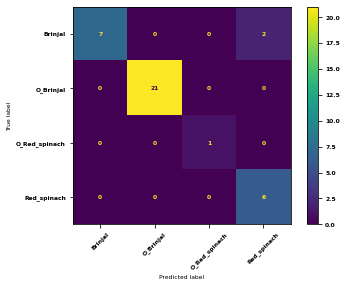


 classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         1
           3       0.75      1.00      0.86         6

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.93        37
weighted avg       0.96      0.95      0.95        37



In [26]:
from sklearn.metrics import precision_recall_fscore_support as score

model = SVC(C=100, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, 
    verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 45)

model.fit(X_train, y_train)
pred = model.predict(X_test)

print('accuracy_score: ', accuracy_score(y_test, pred))
print("Precision Score: ", precision_score(y_test, pred, average='macro'))
print("Recall Score: ", recall_score(y_test, pred, average='macro'))
print('F1 score: %f' % f1_score(y_test, pred, average='macro'))
print('confusion_matrix: \n', confusion_matrix(y_test, pred))
ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=le.classes_, xticks_rotation=45)
plt.show()
print('\n classification_report: \n', classification_report(y_test, pred))

Link of ROC Tutorial: https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb 
https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html

# ROC for multiclass classification

In [28]:
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier

# shuffle and split training and test sets
y_ = label_binarize(y, classes=np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.5, random_state=0)

# Learn to predict each class against the other 
classifier = OneVsRestClassifier(SVC(C=100, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
    probability=True, tol=0.001, cache_size=200, class_weight=None, 
    verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 45))

# y_score = classifier.fit(X_train, y_train).decision_function(X_test)  # for decision boundaries classifires
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)  # classifires, which has no decision boundarie
n_classes = y_.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [29]:
print(y_score.shape, y_test.shape, '\n')
print(y_score[0], '\n\n',y_test[0])

(62, 4) (62, 4) 

[0.00444329 0.87322834 0.         0.04175714] 

 [0 1 0 0]


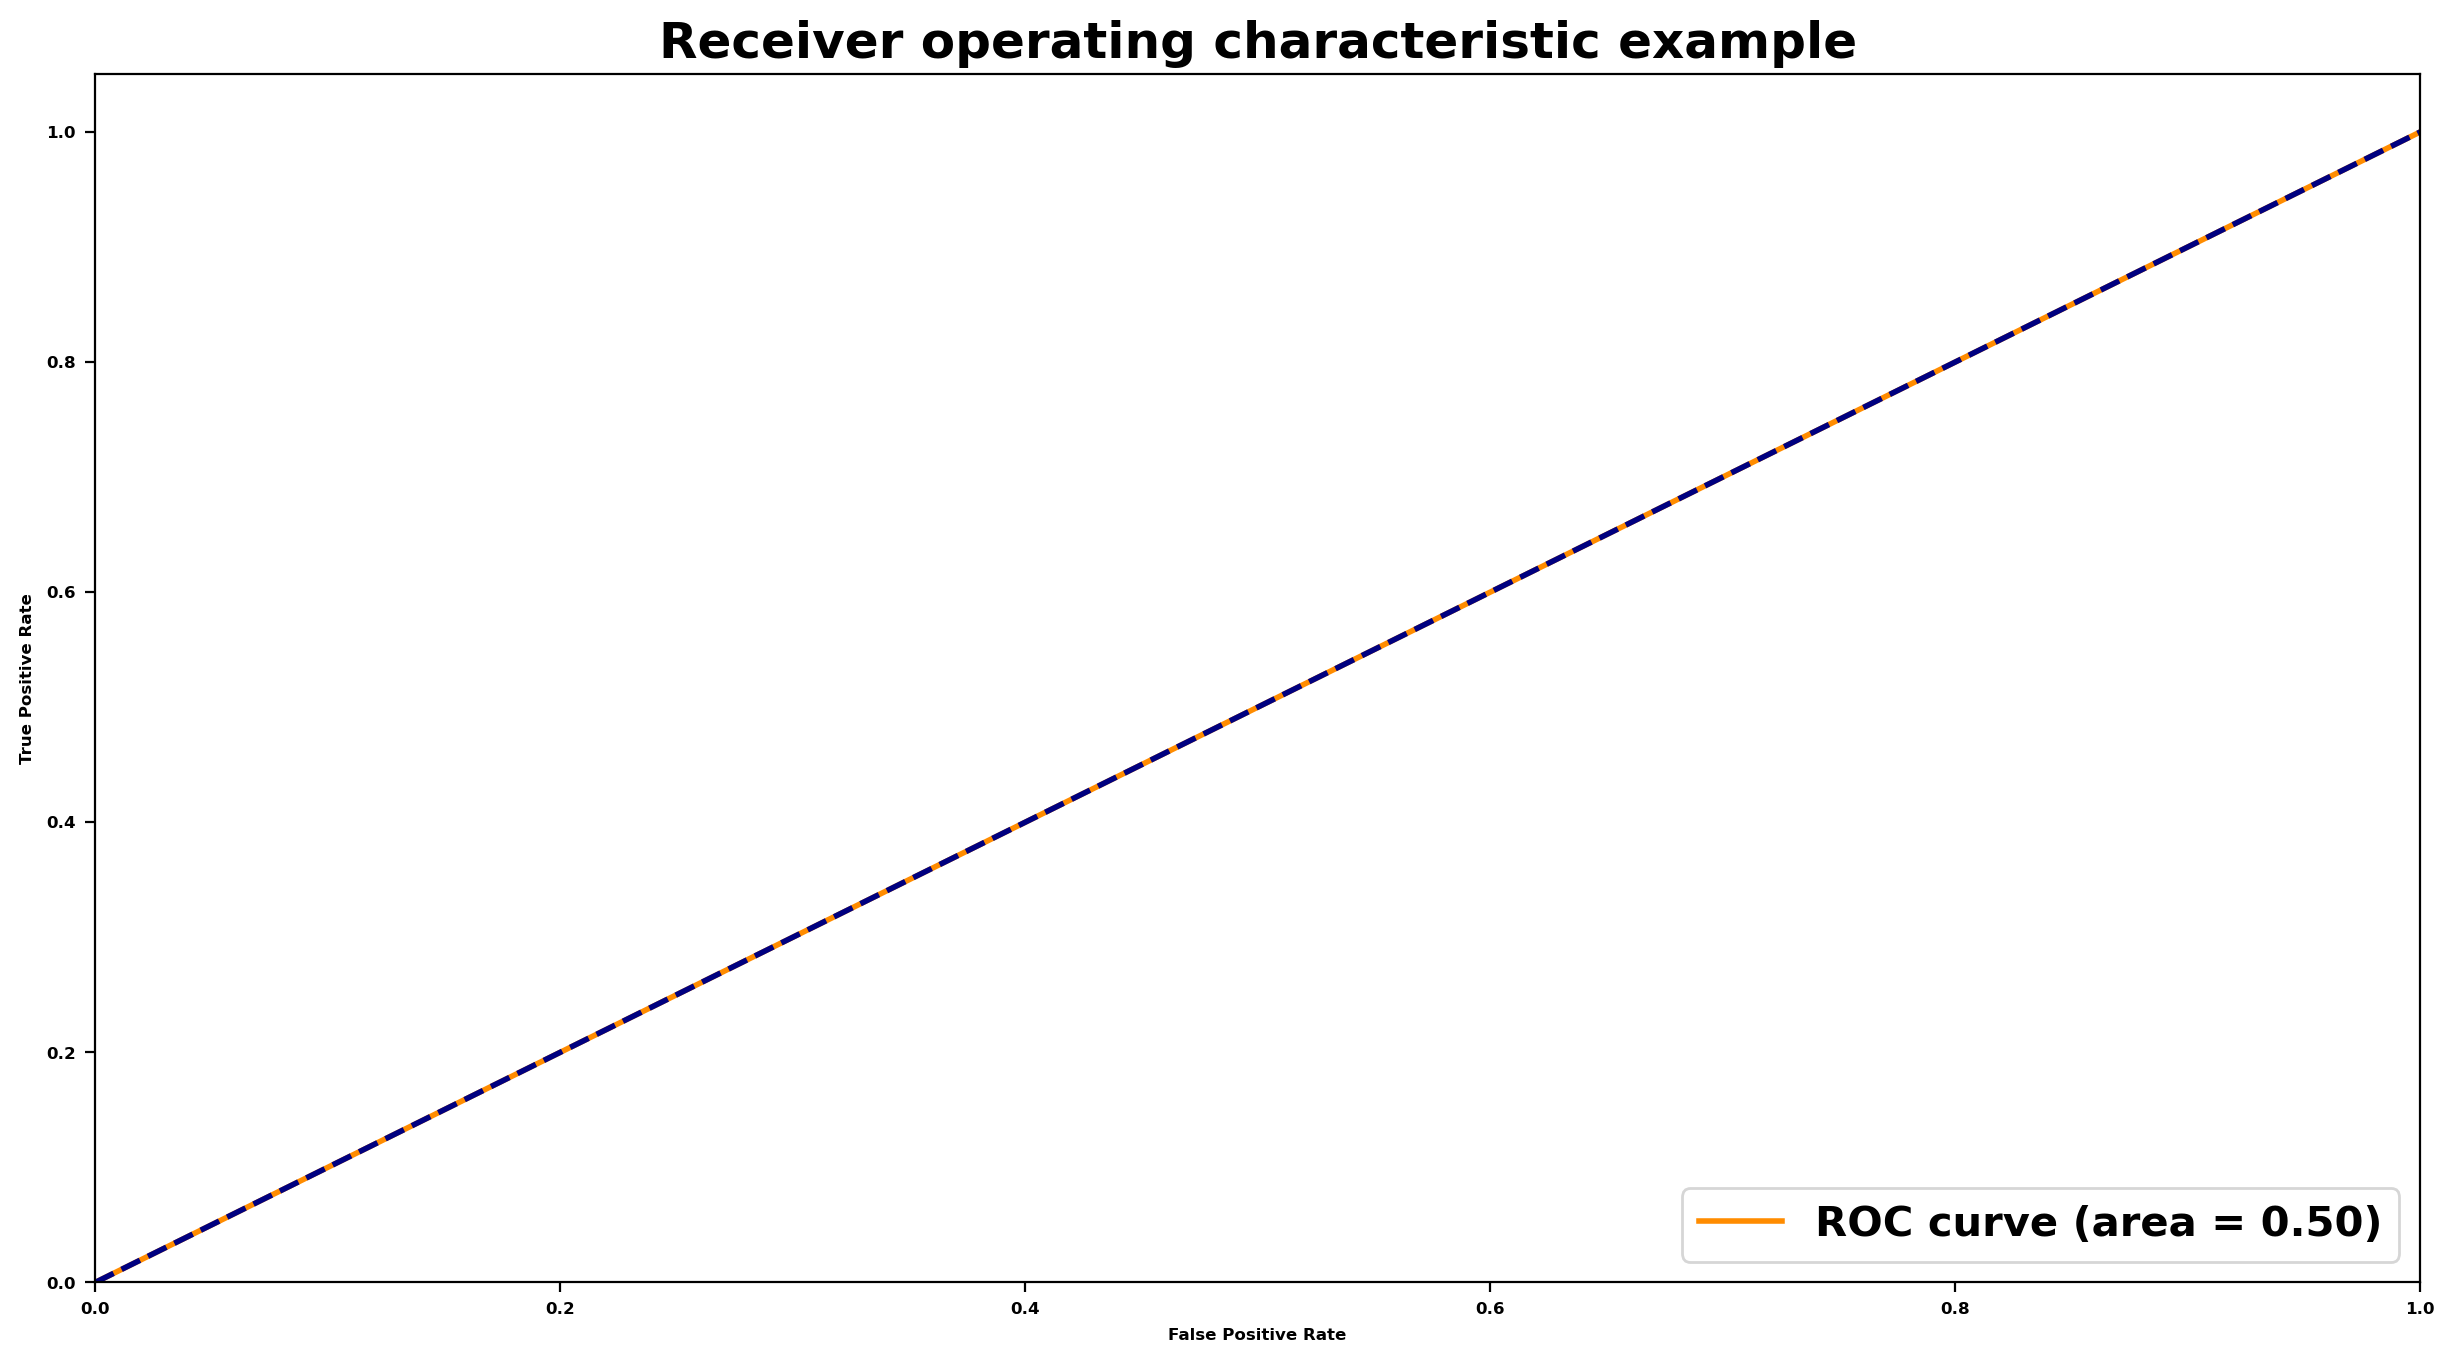

In [30]:
# to see single class roc

plt.figure(figsize=(15, 8), dpi=200, facecolor='w', edgecolor='red')
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    linewidth = 2,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)

plt.rcParams.update({'font.size':15, 'font.weight' : 'bold'})
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", weight ='bold')
plt.ylabel("True Positive Rate", weight ='bold')
plt.title("Receiver operating characteristic example", weight ='bold')
plt.legend(loc="lower right")
plt.show()

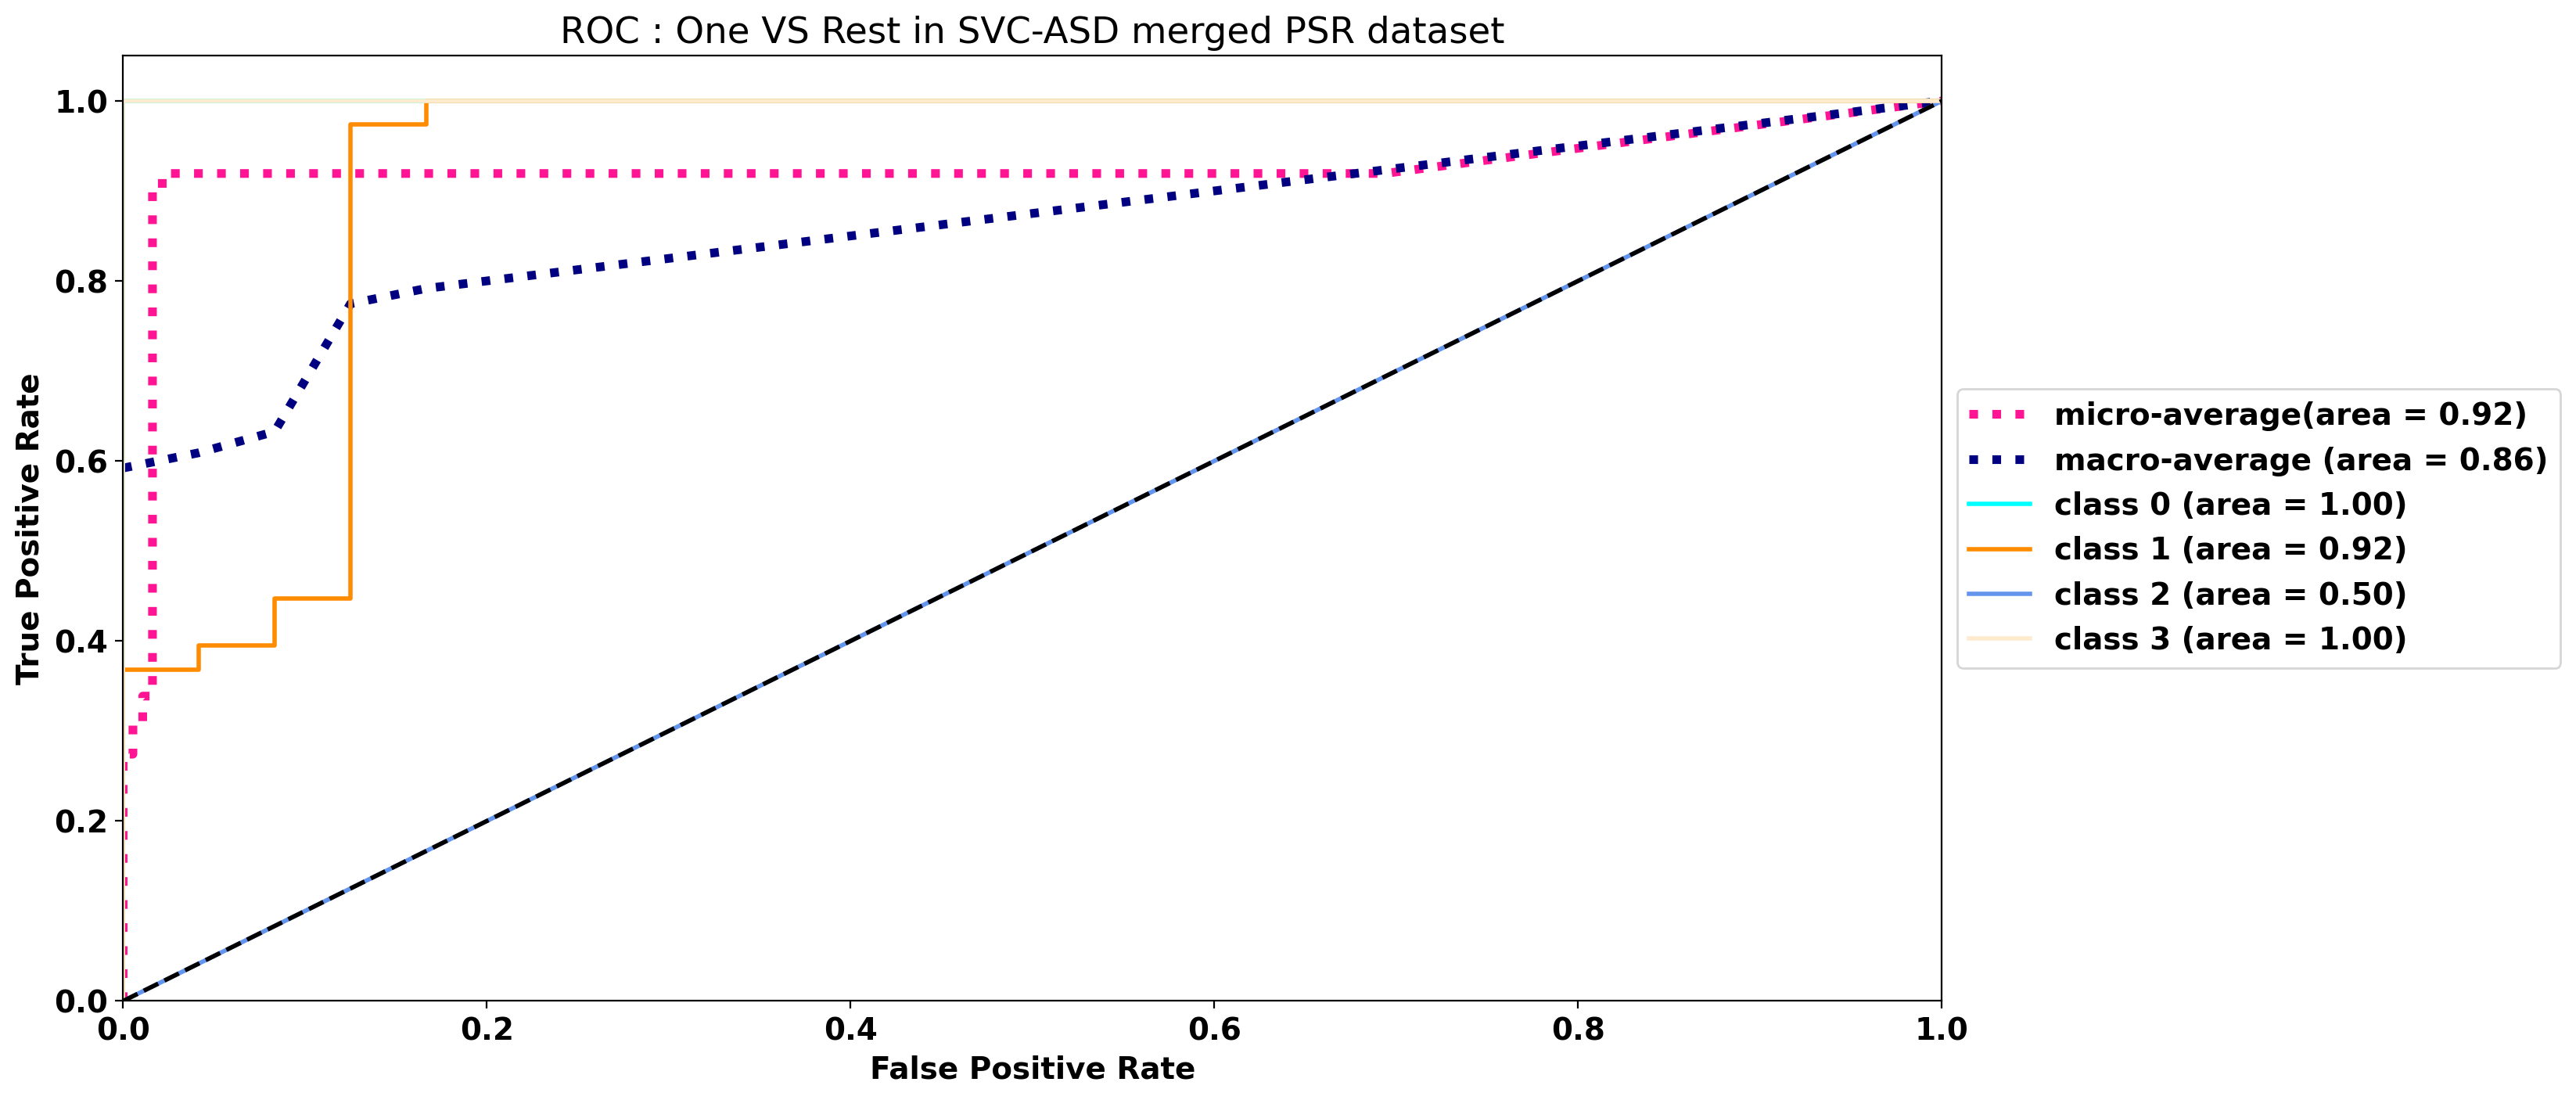

In [35]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.rcParams.update({'font.size':14, 'font.weight' : 'bold'})
plt.figure(figsize=(15, 8), dpi=200, facecolor='w', edgecolor='red')

plt.plot(
    fpr["micro"], tpr["micro"],
    label="micro-average(area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,
)

plt.plot(
    fpr["macro"], tpr["macro"],
    label="macro-average (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "blanchedalmond", "gold", "indigo", "maroon", "olive", "peru", 
               "salmon", "violet", "royalblue", "palegreen", "tan", "mediumvioletred"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        linewidth=2,
        label="class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", weight ='bold')
plt.ylabel("True Positive Rate", weight ='bold')
plt.title("ROC : One VS Rest in SVC-ASD merged PSR dataset")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [36]:
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_score, labels = n_classes, multi_class = 'ovr', average = 'macro')

0.8560855263157895

# It seems that SVC_RBF and SGDClassifier perform well then others, so Let’s pick those two.

In [38]:
# https://towardsdatascience.com/evaluate-ml-classifier-performance-using-statistical-hypothesis-testing-in-python-e4b90eb27dce

from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1= SVC(C=100, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
    probability=True, tol=0.001, cache_size=200, class_weight=None, 
    verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 45),
                          estimator2= SGDClassifier(), 
                          X=X,
                          y=y,
                          scoring='accuracy', 
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.211
The t-statistics is = 1.436
Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.


RandomForestClassifier Mean Accuracy: 99.6% +/-(0.017)
GaussianNB Mean Accuracy: 92.8% +/-(0.081)


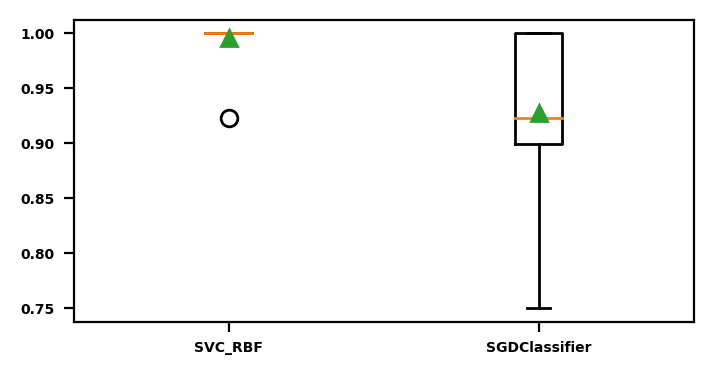

In [40]:
from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate model 1
model1 = SVC(C=100, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 45)
cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2, random_state = 1)
scores1 = cross_val_score(model1, X, y, scoring = 'accuracy', cv = cv1, n_jobs = -1)
print('RandomForestClassifier Mean Accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores1*100), np.std(scores1)))

# evaluate model 2
model2 = SGDClassifier()
cv2 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2, random_state = 1)
scores2 = cross_val_score(model2, X, y, scoring = 'accuracy', cv = cv2, n_jobs = -1)
print('GaussianNB Mean Accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores2*100), np.std(scores2)))

# plot the results
plt.rcParams.update({'font.size':5})
fig = plt.figure(num=None, figsize=(4, 2), dpi=200, facecolor='w', edgecolor='red')
plt.boxplot([scores1, scores2], labels=['SVC_RBF', 'SGDClassifier'], showmeans=True)
plt.show()